In [1]:
import tensorflow as tf
from models import dcgan, utils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolors

%matplotlib inline

In [2]:
checkpoint_dir = 'cosmoGAN_pretrained_weights'

### How to restore weights?

In [6]:
with tf.Graph().as_default() as g:
    with tf.Session(graph=g) as sess:
        
        gan = dcgan.dcgan(output_size=256,
                      nd_layers=4,
                      ng_layers=4,
                      df_dim=64,
                      gf_dim=64,
                      z_dim=64,
                      data_format="NHWC")
        
        gan.inference_graph()
        
        utils.load_checkpoint(sess, gan.saver, 'dcgan', checkpoint_dir, counter=47)
        
        t_vars = tf.trainable_variables()
        d_vars = [var for var in t_vars if 'discriminator/' in var.name]
        g_vars = [var for var in t_vars if 'generator/' in var.name]
        
        g_vars = [(sess.run(var), var.name) for var in g_vars]
        d_vars = [(sess.run(var), var.name) for var in d_vars]

 [*] Reading checkpoints...
INFO:tensorflow:Restoring parameters from cosmoGAN_pretrained_weights/dcgan.model-epoch-47
 [*] Success to read dcgan.model-epoch-47


### How to generate convergence maps?

In [4]:
with tf.Graph().as_default() as g:
    with tf.Session(graph=g) as sess:
        
        gan = dcgan.dcgan(output_size=256,
                      nd_layers=4,
                      ng_layers=4,
                      df_dim=64,
                      gf_dim=64,
                      z_dim=64,
                      data_format="NHWC")
        
        gan.inference_graph()
        
        utils.load_checkpoint(sess, gan.saver, 'dcgan', checkpoint_dir, counter=47)
        
        z_sample = np.random.normal(size=(gan.batch_size, gan.z_dim))
        samples = sess.run(gan.G, feed_dict={gan.z: z_sample})
        
        t_vars = tf.trainable_variables()
        d_vars = [var for var in t_vars if 'discriminator/' in var.name]
        g_vars = [var for var in t_vars if 'generator/' in var.name]
        
        g_vars = [(sess.run(var), var.name) for var in g_vars]# if 'g_h' in var.name]
        d_vars = [(sess.run(var), var.name) for var in d_vars]#if 'd_h' in var.name]

 [*] Reading checkpoints...
INFO:tensorflow:Restoring parameters from cosmoGAN_pretrained_weights/dcgan.model-epoch-47
 [*] Success to read dcgan.model-epoch-47


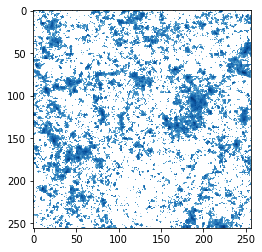

In [5]:
norm = pltcolors.LogNorm(1e-4, samples[5].max(), clip='True')

plt.imshow(np.squeeze(samples[5]), norm=norm, cmap=plt.get_cmap('Blues'));